In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import pathlib
import glob
import imghdr

from pathlib import Path
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
data_dir = pathlib.Path("C:/Users/aruvi/Desktop/Aruviyn/FYPCodes/Sneaker_Classification/sneaker_dataset/images/train")

In [31]:
#CODE TO CHECK IF IMAGES ARE ACCEPTED OR NOT BY TENSORFLOW
from pathlib import Path
import imghdr

data_check = "C:/Users/aruvi/Desktop/Aruviyn/FYPCodes/Sneaker_Classification/sneaker_dataset/images/train"
image_extensions = [".png", ".jpg"]  # add there all your images file extensions

img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
for filepath in Path(data_check).rglob("*"):
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath)
        if img_type is None:
            print(f"{filepath} is not an image")
        elif img_type not in img_type_accepted_by_tf:
            print(f"{filepath} is a {img_type}, not accepted by TensorFlow")

C:\Users\aruvi\Desktop\Aruviyn\FYPCodes\Sneaker_Classification\sneaker_dataset\original\Jordan 8 Retro OVO Black\Jordan-8-Retro-OVO-Black-1.jpg is not an image
C:\Users\aruvi\Desktop\Aruviyn\FYPCodes\Sneaker_Classification\sneaker_dataset\original\Jordan 8 Retro OVO Black\Jordan-8-Retro-OVO-Black-2.jpg is not an image
C:\Users\aruvi\Desktop\Aruviyn\FYPCodes\Sneaker_Classification\sneaker_dataset\original\Jordan 8 Retro OVO Black\Jordan-8-Retro-OVO-Black-3.jpg is not an image


In [3]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

52206


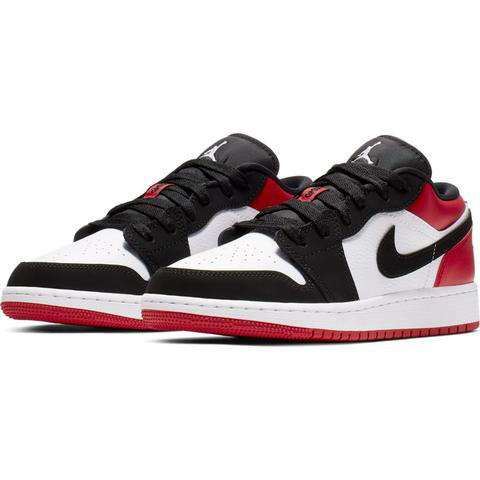

In [4]:
j1lbt = list(data_dir.glob('Jordan 1 Low Black Toe/*'))
PIL.Image.open(str(j1lbt[0]))

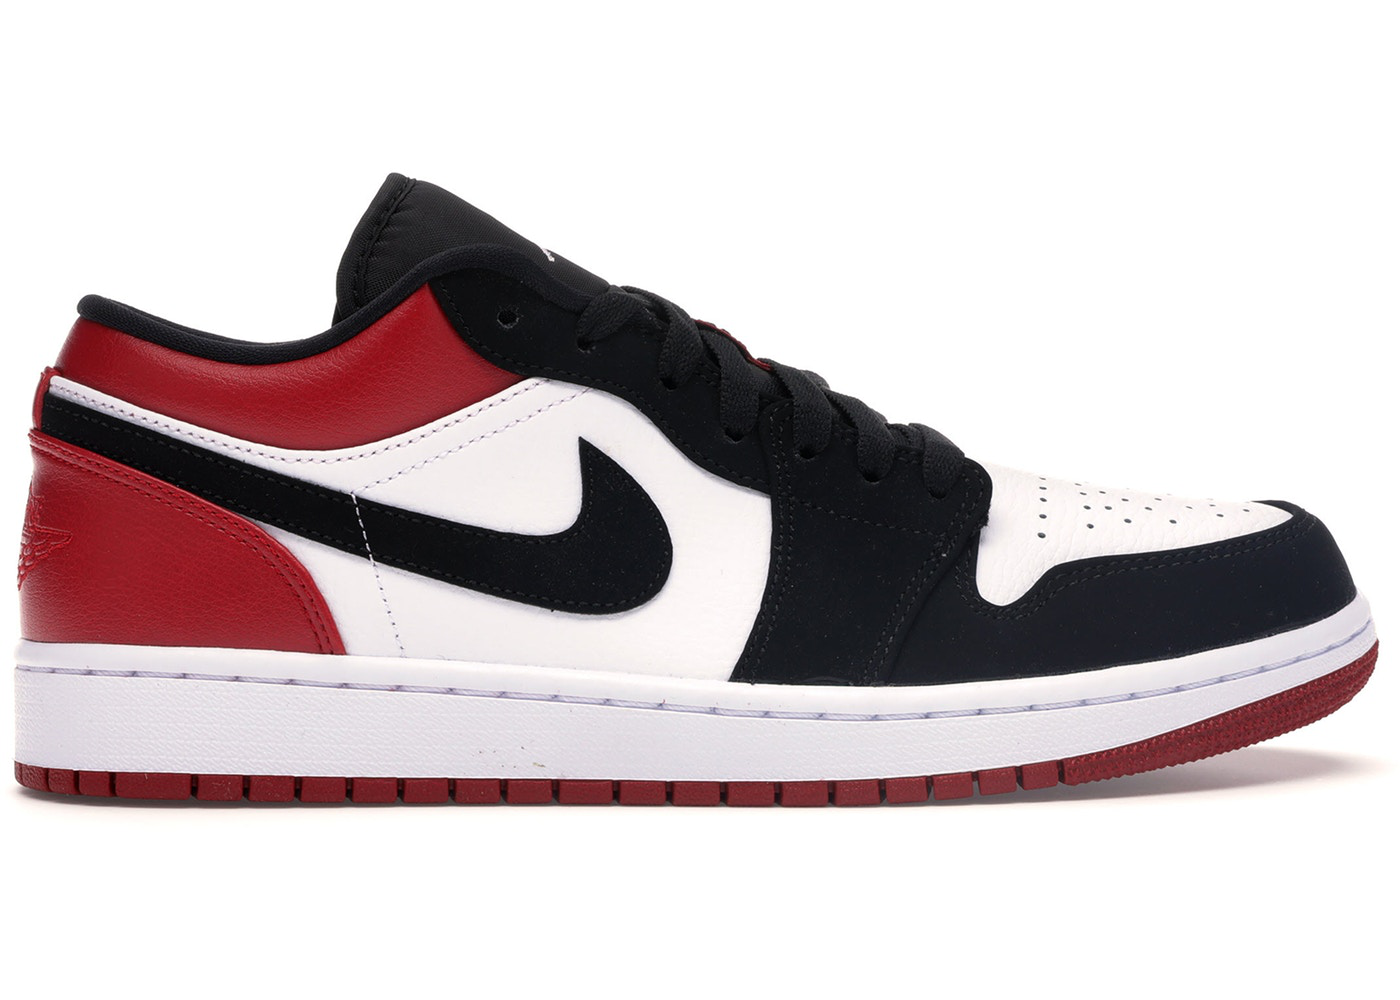

In [5]:
PIL.Image.open(str(j1lbt[1]))

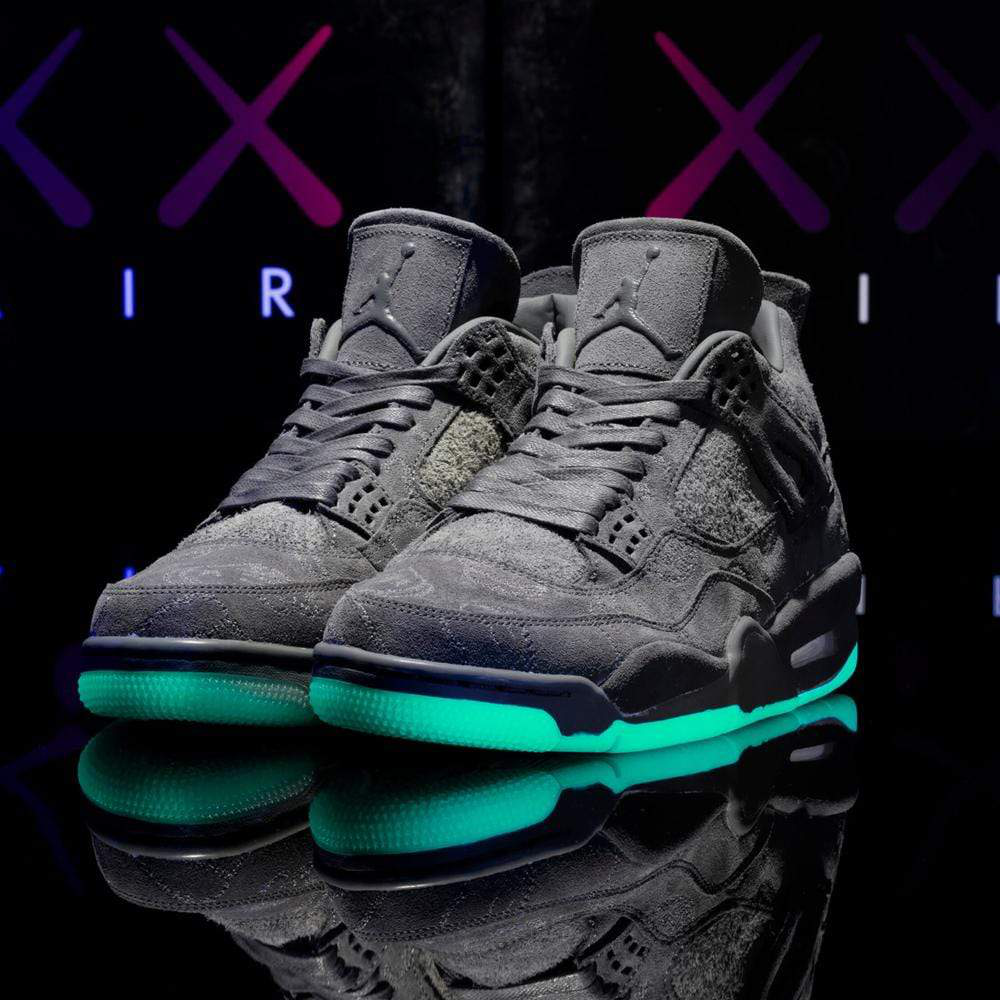

In [6]:
j4rk = list(data_dir.glob('Jordan 4 Retro Kaws/*'))
PIL.Image.open(str(j4rk[0]))

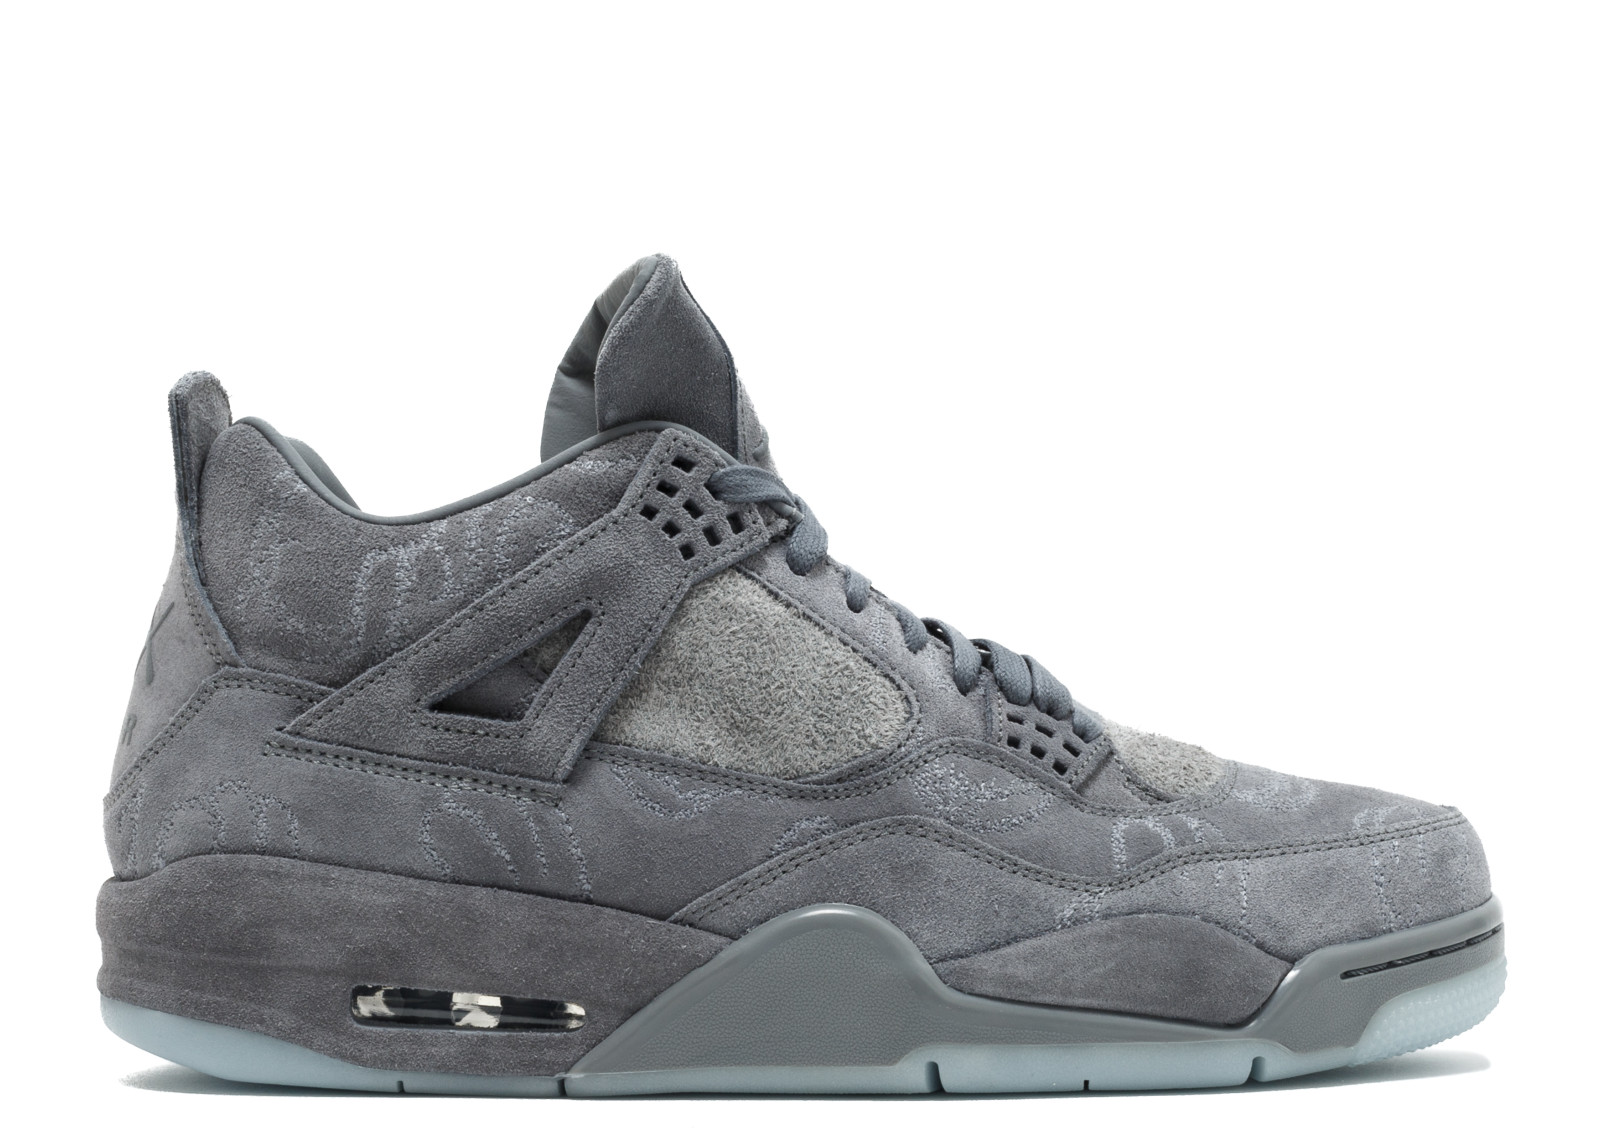

In [7]:
PIL.Image.open(str(j4rk[1]))

In [8]:
batch_size = 64
img_height = 180
img_width = 180

In [9]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 52206 files belonging to 898 classes.
Using 41765 files for training.


In [10]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 52206 files belonging to 898 classes.
Using 10441 files for validation.


In [11]:
class_names = train_ds.class_names
print(class_names)

['A Bathing Ape Bapesta Kanye West College Dropout', 'A Bathing Ape Bapesta Ronnie Fieg Fiegsta Sand', 'ACE 16 PureControl Ultra Boost Kith Flamingos', 'ASICS GT-II Ronnie Fieg __High Risk___', 'ASICS Gel-Lyte III Afew __Koi___', 'ASICS Gel-Lyte III Hanon __Wildcats___', 'ASICS Gel-Lyte III Ronnie Fieg Militia (Special Box)', 'ASICS Gel-Lyte III Ronnie Fieg Super Green', 'ASICS Gel-Lyte III Ronnie Fieg __Flamingo___', 'ASICS Gel-Lyte III Ronnie Fieg __Homage__ (Special Box)_', 'ASICS Gel-Lyte III Ronnie Fieg __Leatherbacks___', 'ASICS Gel-Lyte III Ronnie Fieg __Mint Leaf___', 'ASICS Gel-Lyte III Ronnie Fieg __Salmon Toes___', 'ASICS Gel-Lyte III Woei __Cervidae___', 'Air Fear Of God 1 Black', 'Air Fear Of God 1 Frosted Spruce', 'Air Fear Of God 1 Orange Pulse', 'Air Fear Of God 1 Sail Black', 'Air Fear Of God 1 Yellow', 'Air Fear Of God Moccasin Black', 'Air Fear Of God Moccasin Particle Beige', 'Air Fear Of God Moccasin Pure Platinum', 'Air Fear Of God Raid Black', 'Air Fear of God Ra

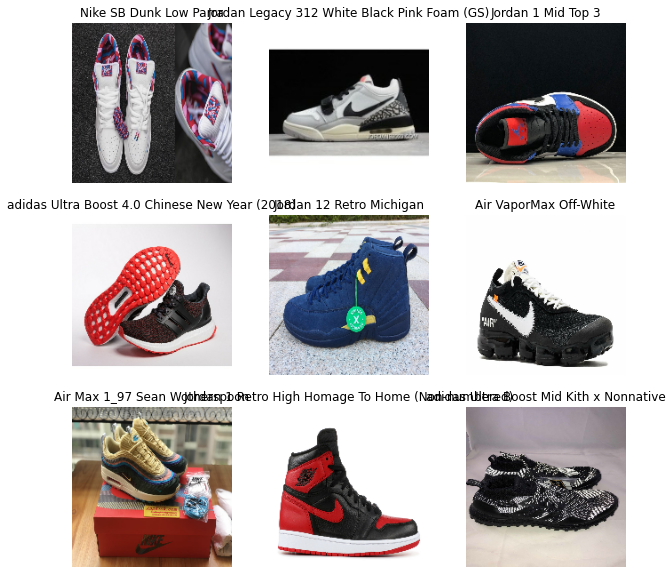

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [13]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(64, 180, 180, 3)
(64,)


In [14]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [15]:
normalization_layer = layers.Rescaling(1./255)

In [16]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image)) 

0.0 1.0


In [17]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [18]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
653/653 [==============================] - ETA: 0s - loss: 6.2207 - accuracy: 0.0137

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

NameError: name 'history' is not defined

In [16]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [17]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

InvalidArgumentError: Number of channels inherent in the image must be 1, 3 or 4, was 2
	 [[{{node decode_image/DecodeImage}}]] [Op:IteratorGetNext]

<Figure size 720x720 with 0 Axes>

In [24]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

NameError: name 'data_augmentation' is not defined

In [25]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [26]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)
model.save('sneaker.model')

Epoch 1/15
 128/1146 [==>...........................] - ETA: 9:22 - loss: 6.7981 - accuracy: 0.0046

InvalidArgumentError: Graph execution error:

Number of channels inherent in the image must be 1, 3 or 4, was 2
	 [[{{node decode_image/DecodeImage}}]]
	 [[IteratorGetNext]] [Op:__inference_train_function_1810]

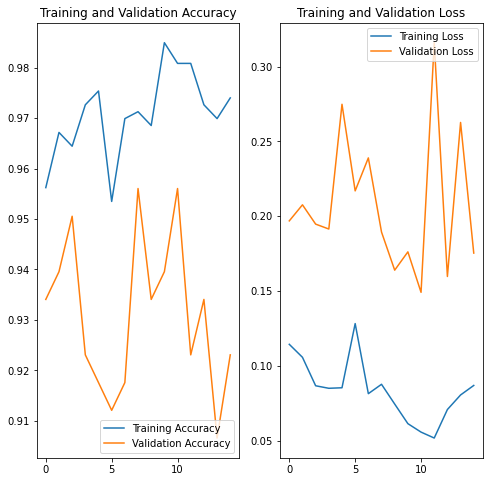

In [50]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [2]:
#To run loaded model, run the this section first!
data_dir = pathlib.Path("C:/Users/aruvi/Desktop/Aruviyn/FYPCodes/Sneaker_Classification/sneaker_dataset/original")

batch_size = 32
img_height = 180
img_width = 180

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = train_ds.class_names

NotFoundError: Could not find directory C:\Users\aruvi\Desktop\Aruviyn\FYPCodes\Sneaker_Classification\sneaker_dataset\original

In [9]:
test_dir = pathlib.Path("C:/Users/aruvi/Desktop/Aruviyn/FYPCodes/Sneaker_Classification/sneaker_dataset/images/test/j12.jpg")

img = tf.keras.utils.load_img(test_dir, target_size=(img_height, img_width))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

model = tf.keras.models.load_model('sneaker.model')
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)


1/1 [==============================] - 0s 86ms/step
This image most likely belongs to Jordan 12 Retro Gym Red with a 100.00 percent confidence.
